# Ad Performance Analysis
Data: Shopping Mall Paid Search Campaign Dataset

via: https://www.kaggle.com/datasets/marceaxl82/shopping-mall-paid-search-campaign-dataset/data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/content/drive/My Drive/shopping_data.csv')
df = pd.DataFrame(df)

## Dataset Overview

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ad Group     190 non-null    object 
 1   Month        190 non-null    object 
 2   Impressions  190 non-null    int64  
 3   Clicks       190 non-null    int64  
 4   CTR          190 non-null    float64
 5   Conversions  190 non-null    int64  
 6   Conv Rate    190 non-null    float64
 7   Cost         190 non-null    int64  
 8   CPC          190 non-null    float64
 9   Revenue      190 non-null    int64  
 10  Sale Amount  190 non-null    float64
 11  P&L          190 non-null    float64
dtypes: float64(5), int64(5), object(2)
memory usage: 17.9+ KB


In [ ]:
df.describe()

,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,14077.363158,4865.805263,0.272105,505.242105,0.079737,3344.063158,0.791263,2957.684211,63416.180579,-386.361916
std,29771.686227,11348.529219,0.107894,1052.202922,0.052859,6524.606753,0.403312,5962.413097,125414.656922,903.073776
min,35.000000,2.000000,0.050000,0.000000,0.000000,1.000000,0.140000,0.000000,0.000000,-5672.271000
25%,1065.000000,264.500000,0.192500,24.000000,0.050000,188.500000,0.480000,144.500000,2985.135000,-294.977500
50%,4969.000000,930.000000,0.285000,70.500000,0.070000,563.500000,0.635000,459.500000,10274.105000,-75.978000
75%,13380.000000,4190.500000,0.360000,428.250000,0.100000,2967.000000,1.107500,2672.250000,59345.195000,-6.027500
max,276568.000000,99526.000000,0.470000,7563.000000,0.500000,43542.000000,2.020000,42440.000000,886095.310000,1507.685000


In [77]:
palette = sns.color_palette("mako")

## EDA

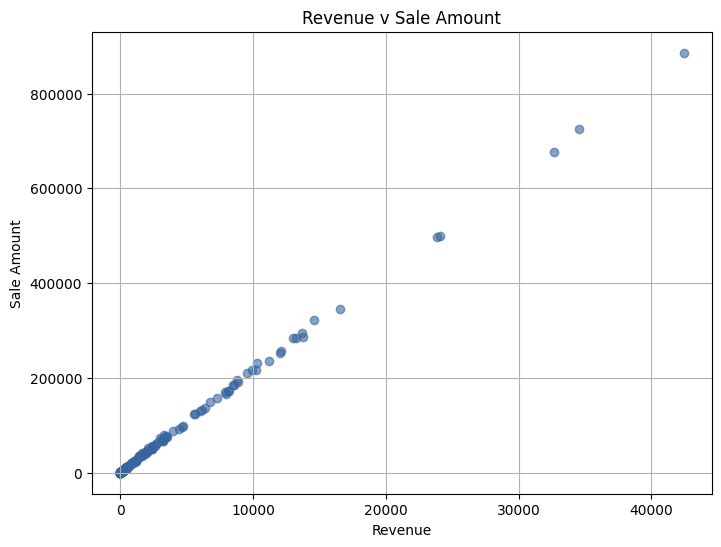

In [78]:
plt.figure(figsize=(8, 6))
plt.scatter(df["Revenue"], df["Sale Amount"], alpha=0.6, color=palette[2])
plt.xlabel("Revenue")
plt.ylabel("Sale Amount")
plt.title("Revenue v Sale Amount")
plt.grid(True)
plt.show()

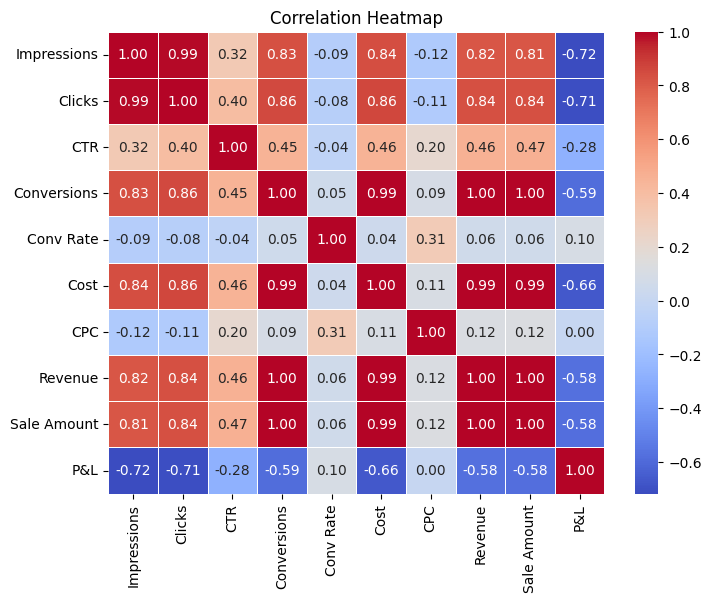

In [53]:
numeric_df = df.select_dtypes(include=["number"])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Time Trends

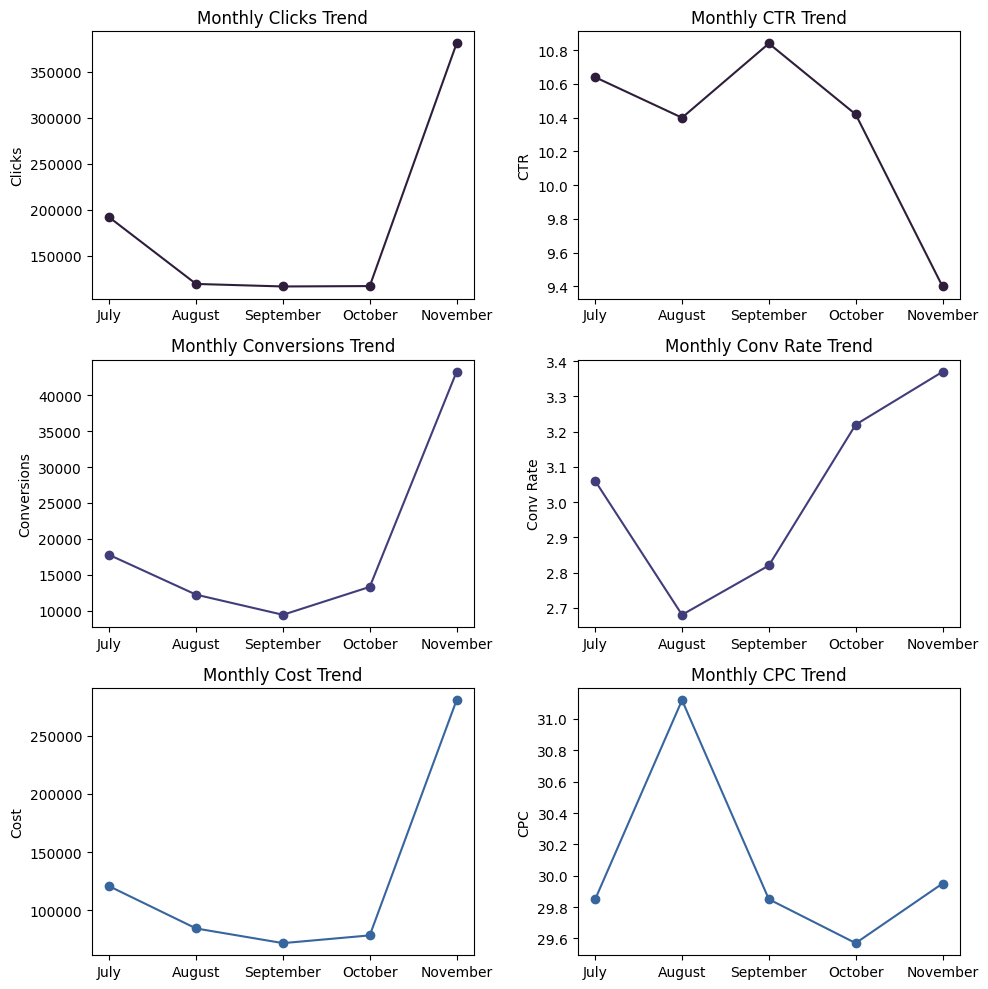

In [79]:
# metrics over time
monthly_data = df.groupby("Month").agg({
    "Clicks": "sum",
    "CTR": "sum",
    "Conversions": "sum",
    "Conv Rate": "sum",
    "Cost": "sum",
    "CPC": "sum",
    "Impressions": "sum",
    "Revenue": "sum",
    "P&L": "sum"
}).reset_index()

month_order = ["July", "August", "September", "October", "November", "December"]
monthly_data["Month"] = pd.Categorical(monthly_data["Month"], categories=month_order, ordered=True)
monthly_data = monthly_data.sort_values("Month")

fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# clicks
axs[0, 0].plot(monthly_data["Month"], monthly_data["Clicks"], marker="o", color=palette[0])
axs[0, 0].set_title("Monthly Clicks Trend")
axs[0, 0].set_ylabel("Clicks")

# CTR
axs[0, 1].plot(monthly_data["Month"], monthly_data["CTR"], marker="o", color=palette[0])
axs[0, 1].set_title("Monthly CTR Trend")
axs[0, 1].set_ylabel("CTR")

# conversions
axs[1, 0].plot(monthly_data["Month"], monthly_data["Conversions"], marker="o", color=palette[1])
axs[1, 0].set_title("Monthly Conversions Trend")
axs[1, 0].set_ylabel("Conversions")

# conv Rate
axs[1, 1].plot(monthly_data["Month"], monthly_data["Conv Rate"], marker="o", color=palette[1])
axs[1, 1].set_title("Monthly Conv Rate Trend")
axs[1, 1].set_ylabel("Conv Rate")

# cost
axs[2, 0].plot(monthly_data["Month"], monthly_data["Cost"], marker="o", color=palette[2])
axs[2, 0].set_title("Monthly Cost Trend")
axs[2, 0].set_ylabel("Cost")

# CPC
axs[2, 1].plot(monthly_data["Month"], monthly_data["CPC"], marker="o", color=palette[2])
axs[2, 1].set_title("Monthly CPC Trend")
axs[2, 1].set_ylabel("CPC")

plt.tight_layout()
plt.show()

Spike in November suggesting seasond demand changes (Black Friday/Cyber Monday).

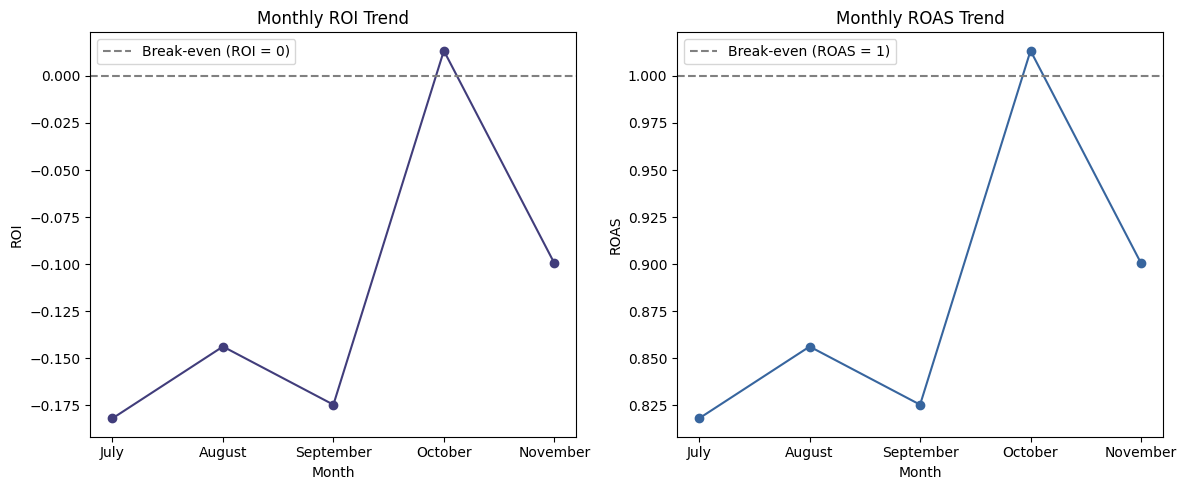

In [80]:
monthly_data["ROI"] = (monthly_data["Revenue"] - monthly_data["Cost"]) / monthly_data["Cost"]
monthly_data["ROAS"] = monthly_data["Revenue"] / monthly_data["Cost"]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# ROI
axs[0].plot(monthly_data["Month"], monthly_data["ROI"], marker="o", color=palette[1])
axs[0].set_title("Monthly ROI Trend")
axs[0].set_ylabel("ROI")
axs[0].set_xlabel("Month")
axs[0].axhline(0, color="gray", linestyle="--", label="Break-even (ROI = 0)")
axs[0].legend()

# ROAS
axs[1].plot(monthly_data["Month"], monthly_data["ROAS"], marker="o", color=palette[2])
axs[1].set_title("Monthly ROAS Trend")
axs[1].set_ylabel("ROAS")
axs[1].set_xlabel("Month")
axs[1].axhline(1, color="gray", linestyle="--", label="Break-even (ROAS = 1)")
axs[1].legend()

plt.tight_layout()
plt.show()

## Ad Performance Analysis

Add categorization columns for better structure of Ad Groups.

In [68]:
# match types
match_types = {
    "1:1": "1:1",
    "exact": "Exact",
    "phrase": "Phrase"
}

#device types
device_types = {
    "desk": "Desktop",
    "mob": "Mobile"
}

#Promotion types
promotion_categories = {
    "competitor": "Competitor",
    "coupon code": "Coupon Code",
    "discount code": "Discount Code",
    "free shipping": "Free Shipping",
    "offer": "Offer",
    "promo code": "Promo Code",
    "sale": "Sale",
    "black friday": "Black Friday / Cyber Monday",
    "cyber monday": "Black Friday / Cyber Monday"
}

df["Match Type"] = df["Ad Group"].apply(lambda x: next((match_types[key] for key in match_types if key in x.lower()), None))
df["Device Type"] = df["Ad Group"].apply(lambda x: next((device_types[key] for key in device_types if key in x.lower()), None))
df["Promotion Type"] = df["Ad Group"].apply(lambda x: next((promotion_categories[key] for key in promotion_categories if key in x.lower()), None))

df.loc[df["Ad Group"].str.contains("coupon", case=False, na=False), "Promotion Type"] = "Coupon Code"
df.loc[df["Ad Group"].str.contains("promo", case=False, na=False), "Promotion Type"] = "Promo Code"

print(df[["Promotion Type", "Match Type", "Device Type"]].isna().sum())

df.info()

Promotion Type    0
Match Type        0
Device Type       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ad Group        190 non-null    object 
 1   Month           190 non-null    object 
 2   Impressions     190 non-null    int64  
 3   Clicks          190 non-null    int64  
 4   CTR             190 non-null    float64
 5   Conversions     190 non-null    int64  
 6   Conv Rate       190 non-null    float64
 7   Cost            190 non-null    int64  
 8   CPC             190 non-null    float64
 9   Revenue         190 non-null    int64  
 10  Sale Amount     190 non-null    float64
 11  P&L             190 non-null    float64
 12  Match Type      190 non-null    object 
 13  Device Type     190 non-null    object 
 14  Promotion Type  190 non-null    object 
dtypes: float64(5), int64(5), object(5)
memory usage: 22.

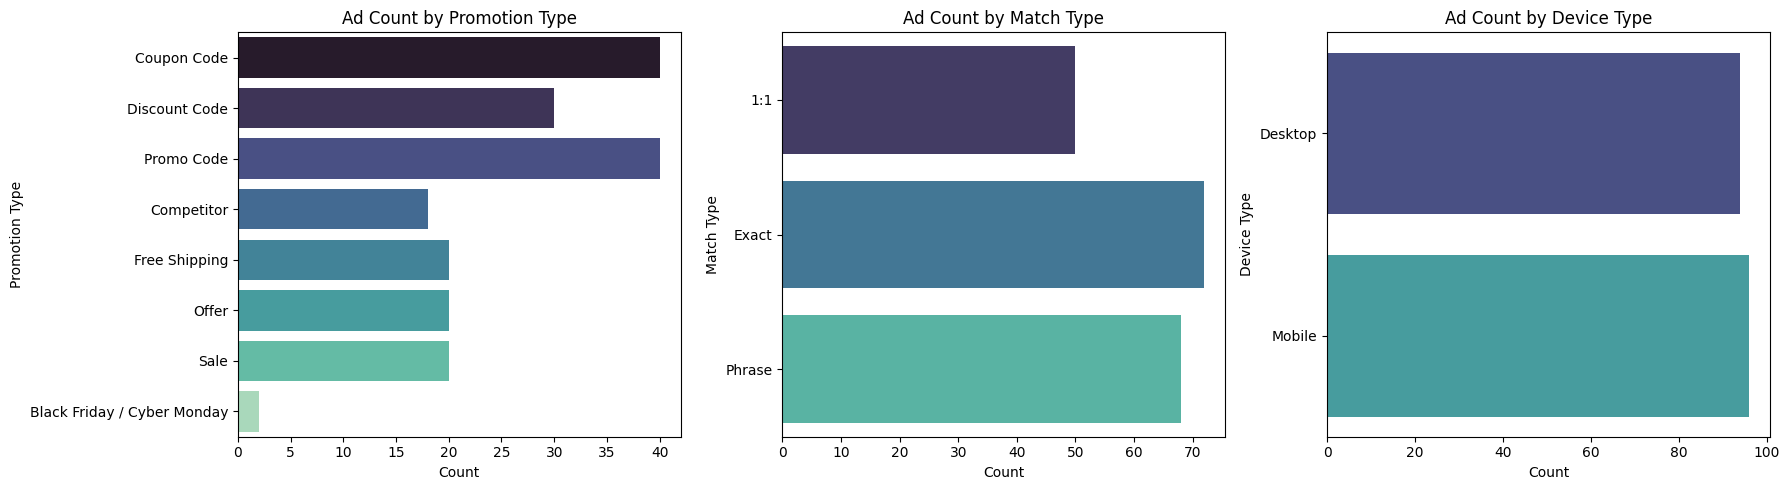

In [84]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(y=df["Promotion Type"], palette="mako", ax=axs[0])
axs[0].set_title("Ad Count by Promotion Type")
axs[0].set_xlabel("Count")
axs[0].set_ylabel("Promotion Type")

sns.countplot(y=df["Match Type"], palette="mako", ax=axs[1])
axs[1].set_title("Ad Count by Match Type")
axs[1].set_xlabel("Count")
axs[1].set_ylabel("Match Type")

sns.countplot(y=df["Device Type"], palette="mako", ax=axs[2])
axs[2].set_title("Ad Count by Device Type")
axs[2].set_xlabel("Count")
axs[2].set_ylabel("Device Type")

plt.tight_layout()
plt.show()

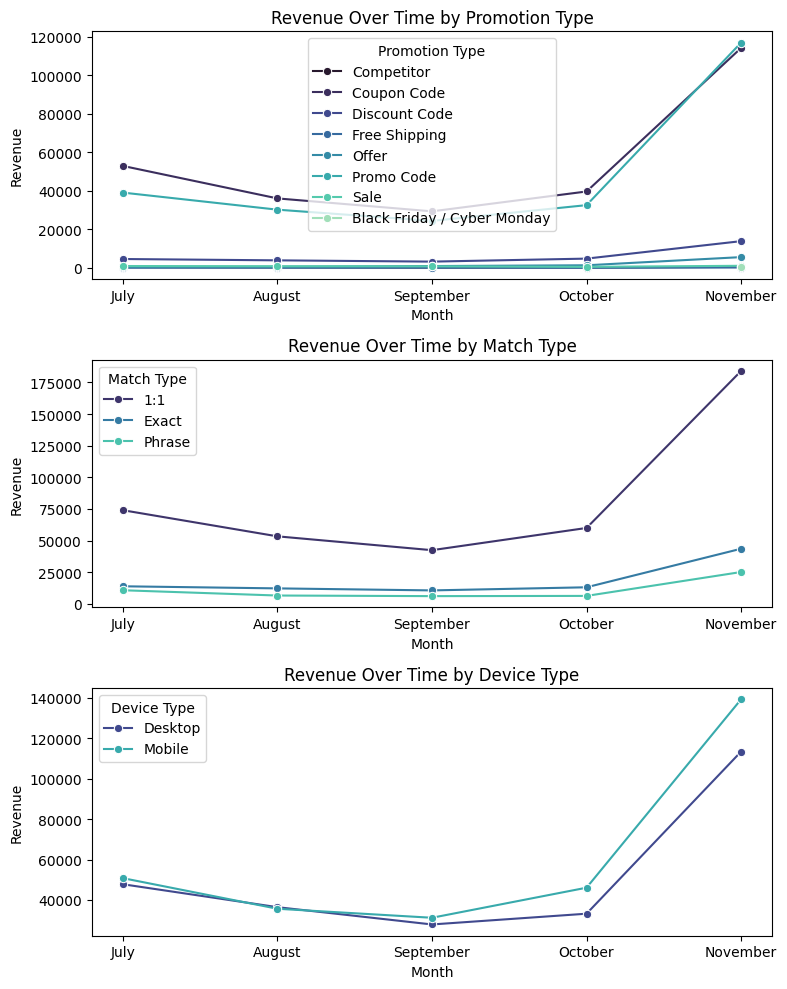

In [92]:
monthly_promotion = df.groupby(["Month", "Promotion Type"]).agg({"Revenue": "sum"}).reset_index()
monthly_match = df.groupby(["Month", "Match Type"]).agg({"Revenue": "sum"}).reset_index()
monthly_device = df.groupby(["Month", "Device Type"]).agg({"Revenue": "sum"}).reset_index()

monthly_promotion["Month"] = pd.Categorical(monthly_promotion["Month"], categories=month_order, ordered=True)
monthly_match["Month"] = pd.Categorical(monthly_match["Month"], categories=month_order, ordered=True)
monthly_device["Month"] = pd.Categorical(monthly_device["Month"], categories=month_order, ordered=True)

fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# promotion type
sns.lineplot(data=monthly_promotion, x="Month", y="Revenue", hue="Promotion Type", palette="mako", ax=axs[0], marker="o")
axs[0].set_title("Revenue Over Time by Promotion Type")
axs[0].set_ylabel("Revenue")
axs[0].set_xlabel("Month")

# match type
sns.lineplot(data=monthly_match, x="Month", y="Revenue", hue="Match Type", palette="mako", ax=axs[1], marker="o")
axs[1].set_title("Revenue Over Time by Match Type")
axs[1].set_ylabel("Revenue")
axs[1].set_xlabel("Month")

# device type
sns.lineplot(data=monthly_device, x="Month", y="Revenue", hue="Device Type", palette="mako", ax=axs[2], marker="o")
axs[2].set_title("Revenue Over Time by Device Type")
axs[2].set_ylabel("Revenue")
axs[2].set_xlabel("Month")

plt.tight_layout()
plt.show()

In [93]:
# promotion type performance
promotion_performance = df.groupby("Promotion Type").agg({
    "Impressions": "sum",
    "Clicks": "sum",
    "Conversions": "sum",
    "Cost": "sum",
    "Revenue": "sum"
}).reset_index()

promotion_performance["CTR"] = promotion_performance["Clicks"] / promotion_performance["Impressions"]
promotion_performance["Conv Rate"] = promotion_performance["Conversions"] / promotion_performance["Clicks"]
promotion_performance["CPC"] = promotion_performance["Cost"] / promotion_performance["Clicks"]
promotion_performance["ROAS"] = promotion_performance["Revenue"] / promotion_performance["Cost"]

promotion_performance

,Promotion Type,Impressions,Clicks,Conversions,Cost,Revenue,CTR,Conv Rate,CPC,ROAS
0,Black Friday / Cyber Monday,3919,290,31,47,205,0.073998,0.106897,0.162069,4.361702
1,Competitor,12524,3479,270,2114,1634,0.277787,0.077609,0.607646,0.772942
2,Coupon Code,1469514,551648,47170,313148,272430,0.375395,0.085507,0.567659,0.869972
3,Discount Code,163620,48862,4628,35467,30495,0.298631,0.094716,0.725861,0.859813
4,Free Shipping,11319,2597,252,742,555,0.229437,0.097035,0.285714,0.747978
5,Offer,71840,15236,1376,12126,8934,0.212082,0.090312,0.795878,0.736764
6,Promo Code,765481,285078,41574,261083,243440,0.372417,0.145834,0.915830,0.932424
7,Sale,176482,17313,695,10645,4267,0.098101,0.040143,0.614856,0.400845


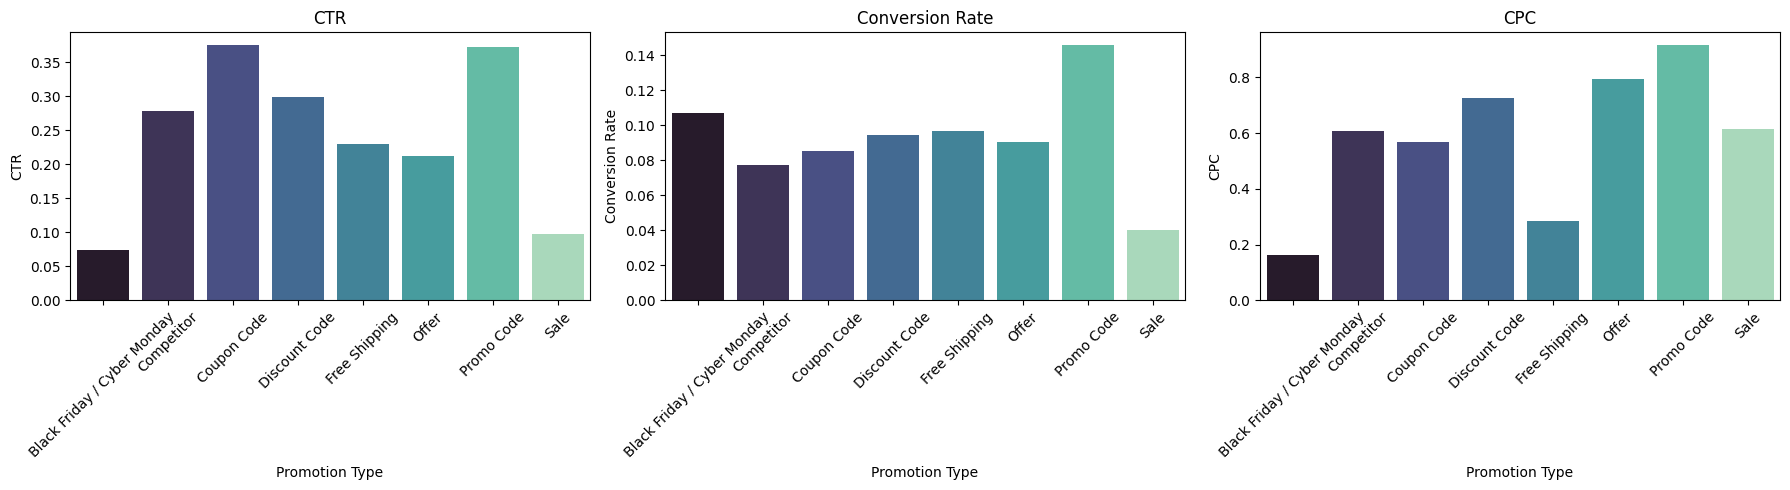

In [109]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(data=promotion_performance, x="Promotion Type", y="CTR", palette="mako", ax=axs[0])
axs[0].set_title("CTR")
axs[0].set_ylabel("CTR")
axs[0].tick_params(axis='x', rotation=45)

sns.barplot(data=promotion_performance, x="Promotion Type", y="Conv Rate", palette="mako", ax=axs[1])
axs[1].set_title("Conversion Rate")
axs[1].set_ylabel("Conversion Rate")
axs[1].tick_params(axis='x', rotation=45)

sns.barplot(data=promotion_performance, x="Promotion Type", y="CPC", palette="mako", ax=axs[2])
axs[2].set_title("CPC")
axs[2].set_ylabel("CPC")
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Coupon Code & Promo Code generate the highest CTR, indicating strong audience interest. Promo Code leads in conversion rate, making it the most effective at turning clicks into purchases. Black Friday / Cyber Monday performs well here, despite low CTR, likely due to high intent shoppers. Sale promotions have the weakest conversion rate, suggesting they may attract clicks but not strong purchasing intent. Promo Code has a high CPC, meaning they are more expensive but can still be worthwhile as ROAS is high (0.93).

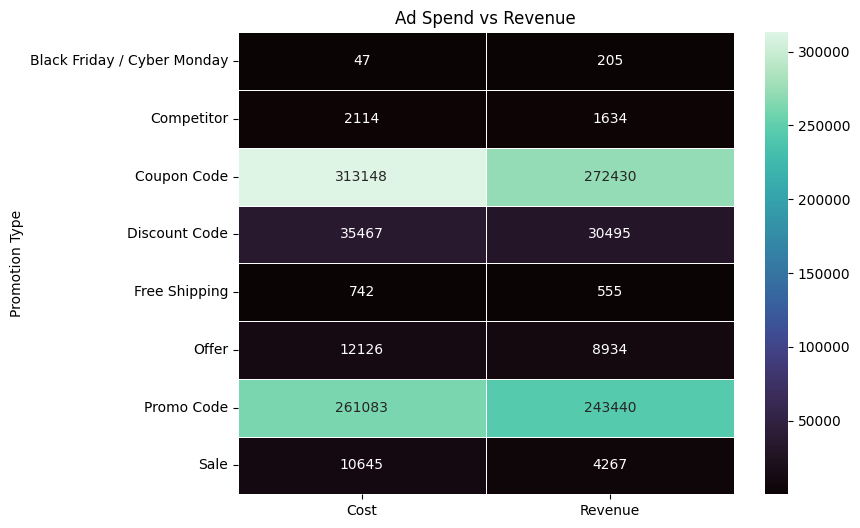

In [119]:
heatmap_data = promotion_performance.set_index("Promotion Type")[["Cost", "Revenue"]]

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="mako", linewidths=0.5)

plt.title("Ad Spend vs Revenue")
plt.ylabel("Promotion Type")

plt.show()

In [102]:
# match type performance
match_performance = df.groupby("Match Type").agg({
    "Impressions": "sum",
    "Clicks": "sum",
    "Conversions": "sum",
    "Cost": "sum",
    "Revenue": "sum"
}).reset_index()

match_performance["CTR"] = match_performance["Clicks"] / match_performance["Impressions"]
match_performance["Conv Rate"] = match_performance["Conversions"] / match_performance["Clicks"]
match_performance["CPC"] = match_performance["Cost"] / match_performance["Clicks"]
match_performance["ROAS"] = match_performance["Revenue"] / match_performance["Cost"]

match_performance

,Match Type,Impressions,Clicks,Conversions,Cost,Revenue,CTR,Conv Rate,CPC,ROAS
0,1:1,1755536,689174,72388,462655,413904,0.392572,0.105036,0.671318,0.894628
1,Exact,523594,149042,15038,105319,93298,0.284652,0.100898,0.706640,0.885861
2,Phrase,395569,86287,8570,67398,54758,0.218134,0.099320,0.781091,0.812457


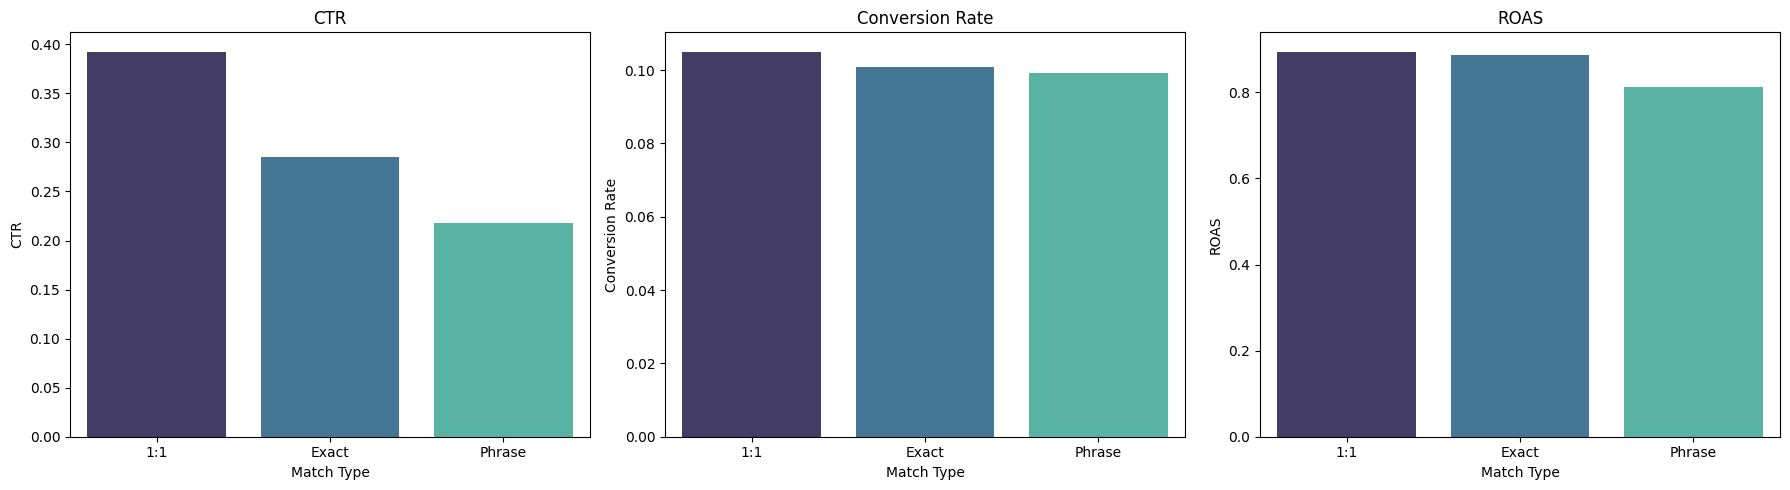

In [122]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(data=match_performance, x="Match Type", y="CTR", palette="mako", ax=axs[0])
axs[0].set_title("CTR")
axs[0].set_ylabel("CTR")

sns.barplot(data=match_performance, x="Match Type", y="Conv Rate", palette="mako", ax=axs[1])
axs[1].set_title("Conversion Rate")
axs[1].set_ylabel("Conversion Rate")

sns.barplot(data=match_performance, x="Match Type", y="ROAS", palette="mako", ax=axs[2])
axs[2].set_title("ROAS")
axs[2].set_ylabel("ROAS")

plt.tight_layout()
plt.show()

To maximize returns, advertisers should prioritize 1:1 Match for engagement and Exact Match for high intent conversions.

In [95]:
# device type performance
device_performance = df.groupby("Device Type").agg({
    "Impressions": "sum",
    "Clicks": "sum",
    "Conversions": "sum",
    "Cost": "sum",
    "Revenue": "sum"
}).reset_index()

device_performance["CTR"] = device_performance["Clicks"] / device_performance["Impressions"]
device_performance["Conv Rate"] = device_performance["Conversions"] / device_performance["Clicks"]
device_performance["CPC"] = device_performance["Cost"] / device_performance["Clicks"]
device_performance["ROAS"] = device_performance["Revenue"] / device_performance["Cost"]

device_performance

,Device Type,Impressions,Clicks,Conversions,Cost,Revenue,CTR,Conv Rate,CPC,ROAS
0,Desktop,757893,234939,42190,286841,258831,0.309990,0.179579,1.220917,0.902350
1,Mobile,1916806,689564,53806,348531,303129,0.359746,0.078029,0.505437,0.869733


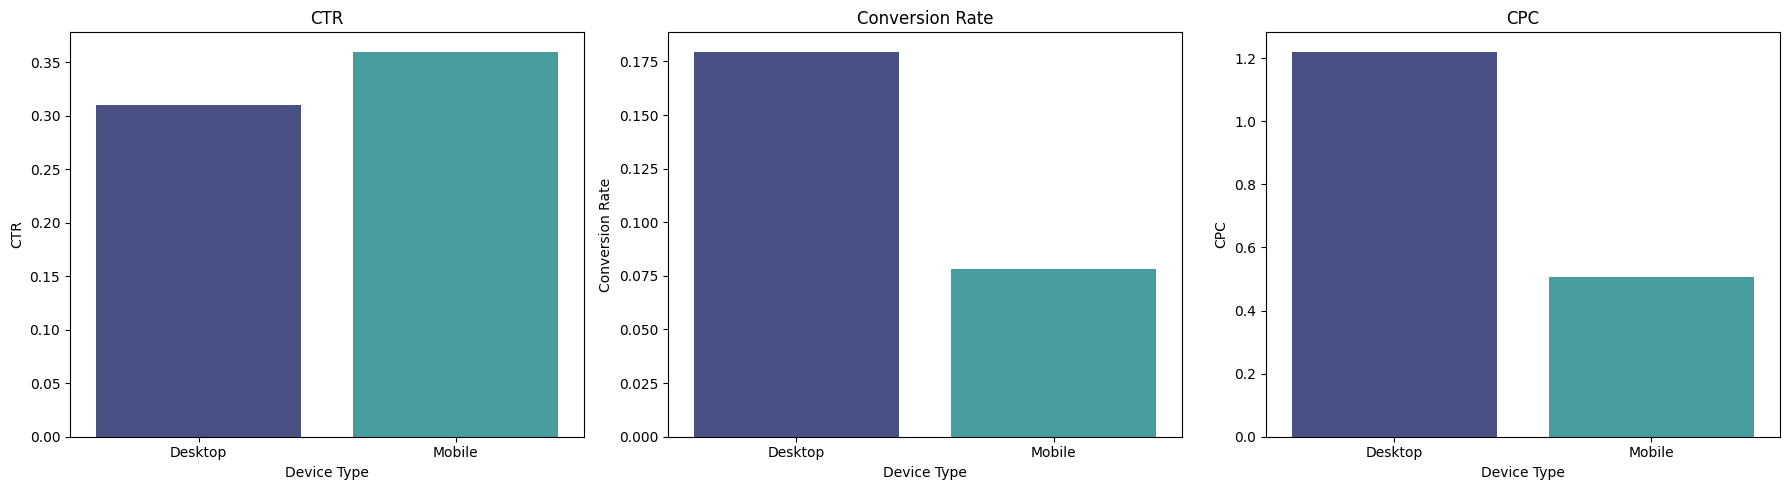

In [124]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(data=device_performance, x="Device Type", y="CTR", palette="mako", ax=axs[0])
axs[0].set_title("CTR")
axs[0].set_ylabel("CTR")

sns.barplot(data=device_performance, x="Device Type", y="Conv Rate", palette="mako", ax=axs[1])
axs[1].set_title("Conversion Rate")
axs[1].set_ylabel("Conversion Rate")

sns.barplot(data=device_performance, x="Device Type", y="CPC", palette="mako", ax=axs[2])
axs[2].set_title("CPC")
axs[2].set_ylabel("CPC")

plt.tight_layout()
plt.show()

 Users are more likely to engage with ads on mobile devices, but desktop users are more likely to complete purchases. High intent campaigns like promotions and checkout related ads can benefit from a push to desktop.

## Ad Type Feature Importance

Identify which factors (Promotion Type, Match Type, Device Type) has the most impact on different performance metrics.

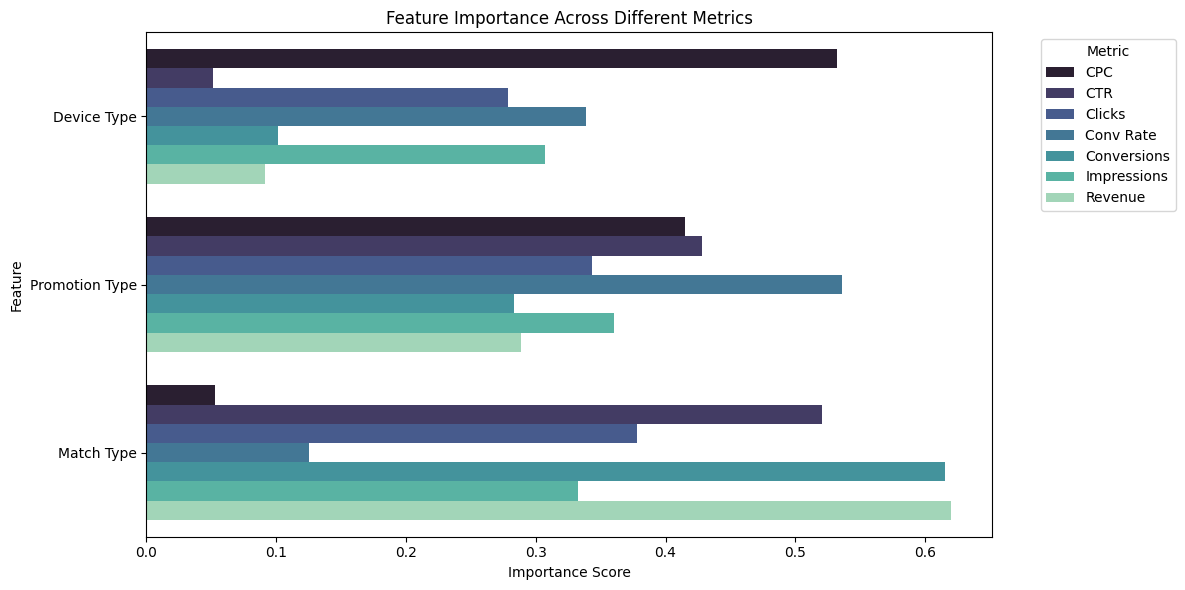

In [143]:
df_encoded = df.copy()
label_encoders = {}
for col in ["Promotion Type", "Match Type", "Device Type"]:
    label_encoders[col] = LabelEncoder()
    df_encoded[col] = label_encoders[col].fit_transform(df_encoded[col])

metrics = ["Impressions", "Clicks", "CTR", "Conversions", "Conv Rate", "CPC", "Revenue"]
feature_importance_results = []

for metric in metrics:
    y = df_encoded[metric].fillna(0)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    importance_df = pd.DataFrame({"Feature": X.columns, "Importance": rf_model.feature_importances_, "Metric": metric})
    feature_importance_results.append(importance_df)


feature_importance_combined = pd.concat(feature_importance_results).sort_values(by=["Metric", "Importance"], ascending=[True, False])

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance_combined, x="Importance", y="Feature", hue="Metric", palette="mako")
plt.title("Feature Importance Across Different Metrics")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

Promotion Type is the strongest predictor for Conversions & Revenue, Match Type has the highest impact on CTR & Conversions, while Device Type heavily influences CPC.